In [ ]:
# Lets start by detecting if we can detect text in the image using tessaract 

In [7]:
import pytesseract
import PIL
from PIL import Image
import os
import numpy as np

In [5]:
# testing image a1 for OCR 
img = Image.open('readonly/small_img/a-0.png')
img.show()

In [7]:
text = pytesseract.image_to_string(img) 
if "Christopher" in text:
    print("found")


found


In [8]:
# lets test all images in file for text "Christopher"

for i in range(4):
    filename = f'readonly/small_img/a-{i}.png'
    img = Image.open(filename)
    text = pytesseract.image_to_string(img)
    if "Christopher" in text:
        print("File :" , filename)
        print("found")
    


File : readonly/small_img/a-0.png
found
File : readonly/small_img/a-3.png
found


In [10]:
# above output shows OCR is wroking without kraken, no need to complicate the code. Its showing Christopher is in image a1 and a3. 
# lets search for mark in large file 
# mark should be in files 0,1,2,3,8,10,13 only 
for i in range(14):
    filename = f'readonly/images/a-{i}.png'
    img = Image.open(filename)
    print(f'processing file : a-{i}.png')
    text = pytesseract.image_to_string(img)
    if "Mark" in text:
        print("Mark found")
    else:
        print("Mark not in file")
    print("----------------------------------------------------")
    
 
    


processing file : a-0.png
Mark found
----------------------------------------------------
processing file : a-1.png
Mark found
----------------------------------------------------
processing file : a-2.png
Mark found
----------------------------------------------------
processing file : a-3.png
Mark found
----------------------------------------------------
processing file : a-4.png
Mark not in file
----------------------------------------------------
processing file : a-5.png
Mark not in file
----------------------------------------------------
processing file : a-6.png
Mark not in file
----------------------------------------------------
processing file : a-7.png
Mark not in file
----------------------------------------------------
processing file : a-8.png
Mark found
----------------------------------------------------
processing file : a-9.png
Mark not in file
----------------------------------------------------
processing file : a-10.png
Mark found
--------------------------------

In [14]:
# Output shows that mark found in required files only. So no need to use kraken , tessaract is working fine.  

# Now have to extract the face images from each image and make a dictionary 

from PIL import ImageDraw
from PIL import Image
import cv2 as cv

cv_img = cv.imread('readonly/small_img/a-0.png')
face_cascade = cv.CascadeClassifier(
    'readonly/haarcascade_frontalface_default.xml')



In [15]:
cv_img_bin = cv.threshold(cv_img,120,255,cv.THRESH_BINARY)[1]
#  OpenCV is return the coordinates as (x,y,w,h), 
#  while PIL.ImageDraw is looking for (x1,y1,x2,y2).

face_coordinates = face_cascade.detectMultiScale(cv_img_bin)
# Now lets see the results
file_with_faces = Image.open('readonly/small_img/a-0.png')



In [ ]:
print(face_coordinates)

In [ ]:
display(crop_faces(face_coordinates,file_with_faces))

In [1]:
# Generate face coordinates from an Image given threshold
def face_coordinate_generator(filepath, threshold=150):
    '''generates coordinates for a face in a given image 
    :param filepath: File dir path for the image file
    :param threshold: threshold value for binarization of file for face detection, out of (0,255)
    :return: ndarray of face coordinates in (x,y,w,h) format
    '''
    import cv2 as cv

    cv_img = cv.imread(filepath)
    face_cascade = cv.CascadeClassifier(
        'readonly/haarcascade_frontalface_default.xml')
    #cv_img_bin = cv.threshold(cv_img, threshold, 255, cv.THRESH_BINARY)[1]
    #  OpenCV is return the coordinates as (x,y,w,h),
    #face_coordinates = face_cascade.detectMultiScale(cv_img_bin,1.35,5 ) # scale = 1,1.15,1.25 etc
    face_coordinates = face_cascade.detectMultiScale(np.array(cv_img), 1.35, 5)
    
    

    return face_coordinates

# After lots of testing, use the following parameters for testing : 
# threshold = 150 
# Scale = 1.35 
# min neighbours = 5 in face cascade function
# new approach, no thresholding required, used ndarray 


In [4]:
# function to generate contact sheet of all faces from a given PIL image and face coordinates
def contactsheet_faces(face_coordinates, file_with_faces):
    '''given face coordinates and file on which faces are, returns a contactsheet containg all the faces in the file
    :param face_coordinates: A ndarray with all the face coordinates generated from openCV 
    :param file_with_faces: PIL Image on which faces are
    :return : a PIL image containing all the faces 
    '''
    pil_img = file_with_faces
    allfaces = []

    MAX_SIZE = (100, 100)  # thumbain size (width,length)
    for x, y, w, h in face_coordinates:

        single_face = pil_img.crop((x, y, x+w, y+h))

        single_face.thumbnail(MAX_SIZE)
        allfaces.append(single_face)

    if len(allfaces) == 0:
        print("NO FACES IN FILE")
        return None

    # create a contact sheet
    images_in_row = 5
    contact_sheet = PIL.Image.new(mode=allfaces[0].mode,
                                  size=(MAX_SIZE[0]*images_in_row, (MAX_SIZE[1]*((len(allfaces)//images_in_row)+1))))
    # Pasting images on contact_sheet
    x = 0
    y = 0

    for img in allfaces:
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y))
        first_image = allfaces[0]
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+first_image.width == contact_sheet.width:
            x = 0
            y = y+first_image.height
        else:
            x = x+first_image.width

    return contact_sheet


In [ ]:
# testing functions to generate contact hseet from a given file and threshold 

imagefiledir = 'readonly/small_img/a-0.png'
testing_threshold = 150

display(contactsheet_faces(face_coordinate_generator(imagefiledir,testing_threshold),Image.open(imagefiledir)))

os.system('say "your program has finished"')


Threshold =  100


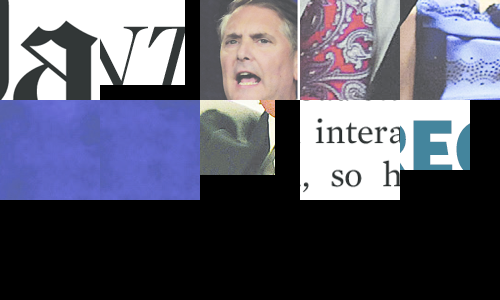

--------------------------------------------------------
Threshold =  110


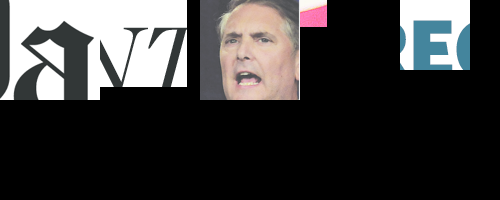

--------------------------------------------------------
Threshold =  120


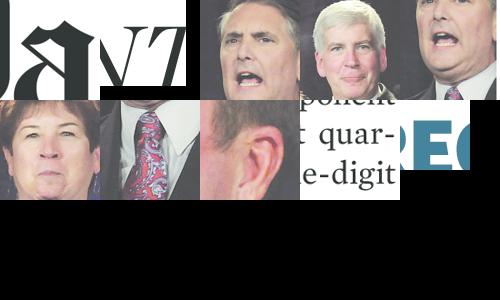

--------------------------------------------------------
Threshold =  130


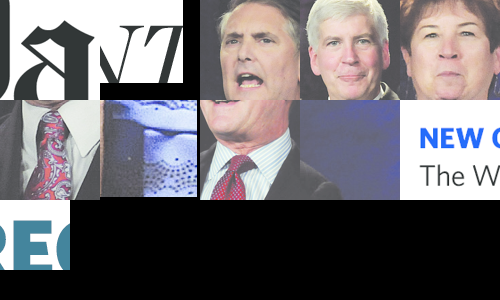

--------------------------------------------------------
Threshold =  140


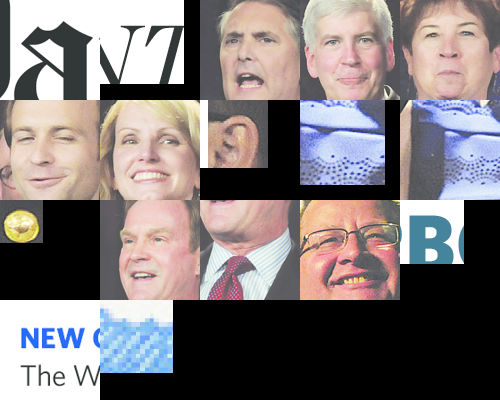

--------------------------------------------------------
Threshold =  150


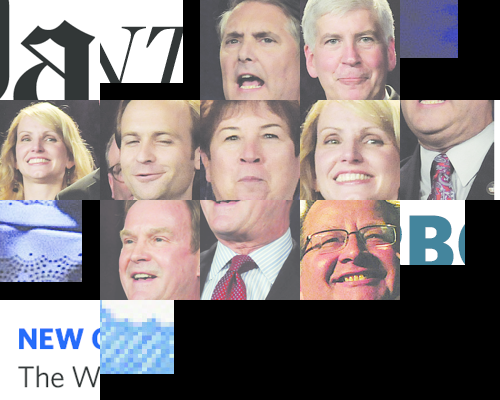

--------------------------------------------------------
Threshold =  160


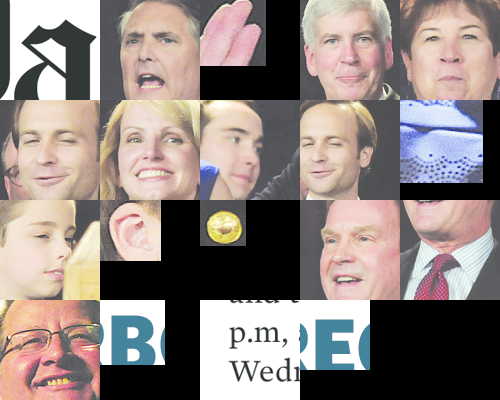

--------------------------------------------------------
Threshold =  170


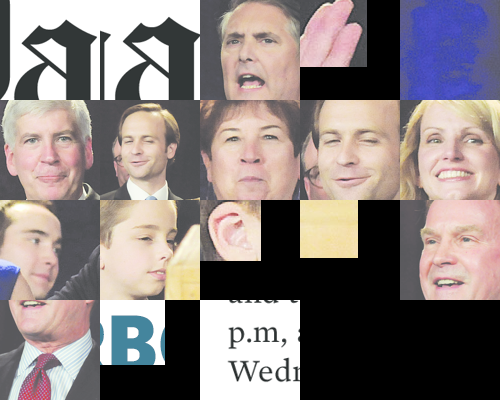

--------------------------------------------------------
Threshold =  180


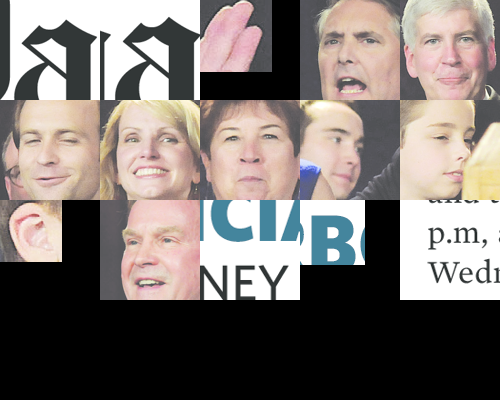

--------------------------------------------------------
Threshold =  190


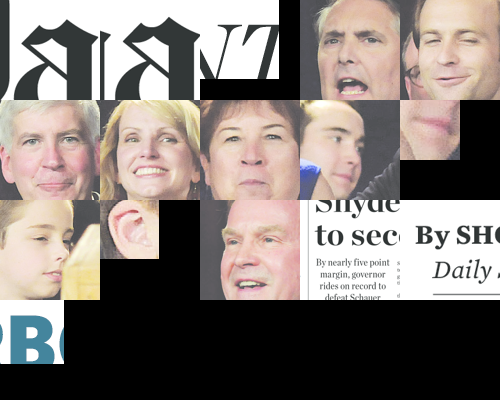

--------------------------------------------------------


In [25]:
# testing image 1 for differnt thresold values 
imagefiledir = 'readonly/small_img/a-0.png'
for i in range(100,200,10):
    print('Threshold = ', i)
    testing_threshold = i
    display(contactsheet_faces(face_coordinate_generator(imagefiledir,testing_threshold),Image.open(imagefiledir)))
    print('--------------------------------------------------------')

os.system('say "your program has finished"')


In [27]:

# functions worked, but, too mane false positives. have to reduce that 
# False positives reduced, using min neighbours parameteres f


0

File : a-0 
------------------


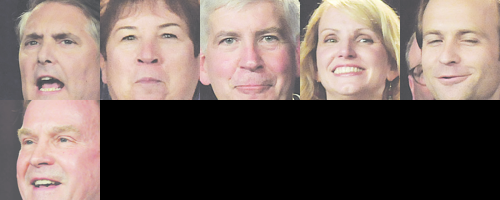

-------------------


File : a-1 
------------------


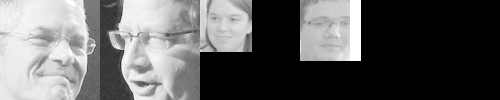

-------------------


File : a-2 
------------------


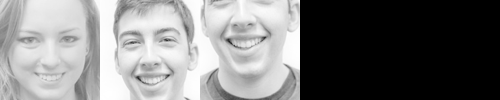

-------------------


File : a-3 
------------------


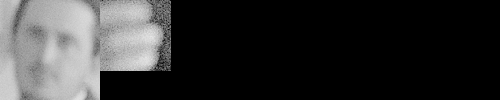

-------------------


File : a-4 
------------------
NO FACES IN FILE


None

-------------------


File : a-5 
------------------


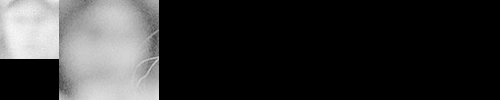

-------------------


File : a-6 
------------------


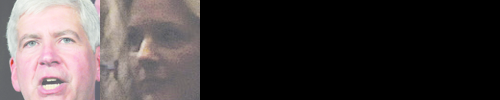

-------------------


File : a-7 
------------------
NO FACES IN FILE


None

-------------------


File : a-8 
------------------
NO FACES IN FILE


None

-------------------


File : a-9 
------------------


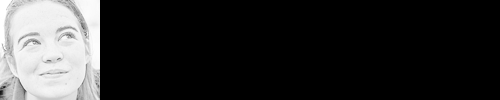

-------------------


File : a-10 
------------------
NO FACES IN FILE


None

-------------------


File : a-11 
------------------
NO FACES IN FILE


None

-------------------


File : a-12 
------------------
NO FACES IN FILE


None

-------------------


File : a-13 
------------------


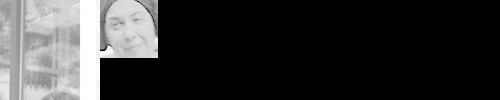

-------------------




0

In [8]:
# testing
# generating contact sheets from all images in small folder
for i in range(14):
    imagefiledir = f'readonly/images/a-{i}.png'
    testing_threshold = 150
    print(f"File : a-{i} ")
    print('------------------')
    display(contactsheet_faces(face_coordinate_generator(imagefiledir, testing_threshold), Image.open(imagefiledir)))

    print("-------------------")
    print('\n')
os.system('say "your program has finished"')


In [ ]:
# all faces in files detected successfully

In [10]:
# Searching for text and if text found, generating contact sheet output 
def text_search_in_image(text,image):
    '''Searches a given text using OCR in a PIL Image and returns True if text found 
    :param text: a string containg text to be searched
    :param image: a PIL image 
    :return : True if text found in image, False if not 
    '''
    img = image
    text = text.lower()
    
    alltext = pytesseract.image_to_string(img)
    alltext = alltext.lower()
    if text in alltext:
        return True
    else:
        return False
    

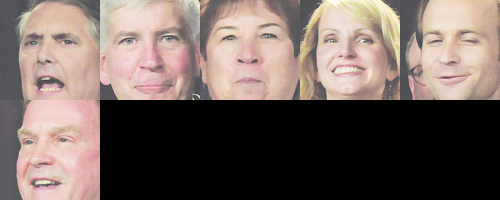

Text not found
Text not found


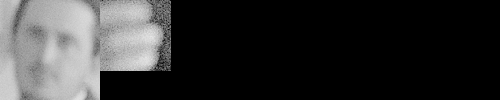

In [12]:
# testing small file with Christopher 
search = 'Christopher'
for i in range(4):
    file = f'readonly/small_img/a-{i}.png'
    image = Image.open(file)
    if text_search_in_image(search,image):
        display(contactsheet_faces(face_coordinate_generator(
            file, testing_threshold), Image.open(file)))
    else :
        print('Text not found')
        


    


In [ ]:
# Opening Zip files and geerating  file list 
from zipfile import ZipFile

with ZipFile('readonly/small_img.zip') as zf:
    for file in zf.namelist():
        if not file.endswith('.png'): # filtering .png files 
            continue
        with zf.open(file) as f:
            image = Image.open(f)
            display(image)

# worked. Alll images displayed successfully 
